In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import cm
from scipy.stats import multivariate_normal

from matchbox.find_gamma import find_quasicliques, Graph, Edge
from matchbox.hypergraph import compute_thresholds

plt.style.use('seaborn')
plt.style.use('seaborn-paper')
plt.style.use('tableau-colorblind10')

plt.rcParams.update({
    'figure.figsize': (3, 3),
    'text.usetex': False,
})

In [2]:
# I have lost the original data, so I reconstruct the graph by hand
bad_edges = [
    ('1MCDR ⊆ 1Y-CMR', '5Y-CMR ⊆ 5Y-CMR'),
    ('1MCDR ⊆ 1Y-CMR', 'dD ⊆ dD'),
    ('1MCDR ⊆ 1Y-CMR', 'bC ⊆ bC'),
    ('1MCDR ⊆ 1Y-CMR', '3M-R-AA ⊆ 3M-R-AA'),
    ('1MCDR ⊆ 1Y-CMR', '1Y-CMR ⊆ 30Y-CMR'),
    ('1MCDR ⊆ 1Y-CMR', '3Y-CMR ⊆ 3Y-CMR'),

    ('1Y-CMR ⊆ 30Y-CMR', '5Y-CMR ⊆ 5Y-CMR'),
    ('1Y-CMR ⊆ 30Y-CMR', '3M-R-AA ⊆ 3M-R-AA'),
    ('1Y-CMR ⊆ 30Y-CMR', '3Y-CMR ⊆ 3Y-CMR'),
    ('1Y-CMR ⊆ 30Y-CMR', 'cu ⊆ cu'),
    ('1Y-CMR ⊆ 30Y-CMR', 'dD ⊆ dD'),
    ('1Y-CMR ⊆ 30Y-CMR', 'bC ⊆ bC'),
    ('1Y-CMR ⊆ 30Y-CMR', '3M-R-SM ⊆ 3M-R-SM'),

    ('3Y-CMR ⊆ fF', '3M-R-AA ⊆ 3M-R-AA'),
    ('3Y-CMR ⊆ fF', 'bC ⊆ bC'),
    ('3Y-CMR ⊆ fF', 'dD ⊆ dD'),

    ('fF ⊆ 3Y-CMR', 'dD ⊆ dD'),
    ('fF ⊆ 3Y-CMR', '3M-R-AA ⊆ 3M-R-AA'),
    ('fF ⊆ 3Y-CMR', 'bC ⊆ bC'),

    ('1MCDR ⊆ 1Y-CMR', '3M-R-SM ⊆ 3M-R-SM')
]
# BAD OK

good_edges = [
    ('3Y-CMR ⊆ 3Y-CMR', '5Y-CMR ⊆ 5Y-CMR'),
    ('3Y-CMR ⊆ 3Y-CMR', 'cu ⊆ cu'),
    ('3Y-CMR ⊆ 3Y-CMR', 'dD ⊆ dD'),
    ('3Y-CMR ⊆ 3Y-CMR', 'bC ⊆ bC'),
    ('3Y-CMR ⊆ 3Y-CMR', '3M-R-AA ⊆ 3M-R-AA'),

    ('3M-R-SM ⊆ 3M-R-SM', '5Y-CMR ⊆ 5Y-CMR'),
    ('3M-R-SM ⊆ 3M-R-SM', 'dD ⊆ dD'),
    ('3M-R-SM ⊆ 3M-R-SM', 'bC ⊆ bC'),
    ('3M-R-SM ⊆ 3M-R-SM', '3M-R-AA ⊆ 3M-R-AA'),

    ('3M-R-AA ⊆ 3M-R-AA', '5Y-CMR ⊆ 5Y-CMR'),
    ('3M-R-AA ⊆ 3M-R-AA', 'dD ⊆ dD'),
    ('3M-R-AA ⊆ 3M-R-AA', 'bC ⊆ bC'),
    ('3M-R-AA ⊆ 3M-R-AA', 'fF ⊆ fF'),

    ('fF ⊆ fF', '5Y-CMR ⊆ 5Y-CMR'),
    ('fF ⊆ fF', 'cu ⊆ cu'),
    ('fF ⊆ fF', 'dD ⊆ dD'),
    ('fF ⊆ fF', 'bC ⊆ bC'),

    ('bC ⊆ bC', '5Y-CMR ⊆ 5Y-CMR'),
    ('bC ⊆ bC', 'cu ⊆ cu'),
    ('bC ⊆ bC', 'dD ⊆ dD'),

    ('dD ⊆ dD', 'cu ⊆ cu'),
    ('dD ⊆ dD', '5Y-CMR ⊆ 5Y-CMR'),
    ('cu ⊆ cu', '5Y-CMR ⊆ 5Y-CMR')

]

In [3]:
G = nx.Graph()
for n1, n2 in bad_edges:
    G.add_edge(n1, n2)
for n1, n2 in good_edges:
    G.add_edge(n1, n2)

In [4]:
degrees = list(map(lambda d: d[1], G.degree))
max_degree = len(G) - 1
vmin = min(degrees)
vmax = max_degree

In [5]:
_, min_acceptable_degree = compute_thresholds(2, len(G), len(G.edges), Lambda=0.1, gamma=0.8)

In [6]:
quasi_cliques = list(find_quasicliques(Graph(G, map(Edge, G.edges)), lambd=0.1, gamma=0.8, grow=True))
maximal_idx = np.flip(np.argsort(list(map(len, quasi_cliques))))
maximal = quasi_cliques[maximal_idx[0]]

In [7]:
options = {
    "node_size": 100,
    "linewidths": 0.,
    "width": 0.5,
}

sm = cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))

In [8]:
def same(v):
    a, b = v.split('⊆')
    return a.strip() == b.strip()


def node_color(v):
    if same(v):
        return '#000000'
    return '#555555'


def edge_color(e):
    if same(e[0]) and same(e[1]):
        return '#000000'
    return '#555555'


def edge_style(e):
    if same(e[0]) and same(e[1]):
        return '-'
    return ':'

In [9]:
accepted_nodes = list(filter(lambda n: G.degree(n) >= min_acceptable_degree, G))
rejected_nodes = list(filter(lambda n: G.degree(n) < min_acceptable_degree, G))

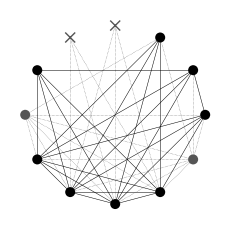

In [10]:
plt.figure(figsize=(3, 3))

nx.draw(
    G, pos=nx.shell_layout(G), with_labels=False, nodelist=accepted_nodes,
    node_color=list(map(node_color, accepted_nodes)),
    edge_color=list(map(edge_color, G.edges)), style=list(map(edge_style, G.edges)), **options
)
nx.draw_networkx_nodes(G, pos=nx.shell_layout(G), nodelist=rejected_nodes,
                       node_color=list(map(node_color, rejected_nodes)), node_size=100, node_shape='x')
plt.xlim(-1.2, 1.2)
#plt.savefig('/home/aalvarez/Downloads/full_graph.svg', bbox_inches='tight', transparent=True)
plt.show()

In [11]:
def induced_edge(V):
    def __inner(e):
        if e[0] in V and e[1] in V:
            return '#000000'
        return '#FF0000'

    return __inner

In [12]:
def plot_quasiclique(ax: plt.Axes, G: nx.Graph, clique):
    nodes_in_quasiclique = list(filter(lambda n: n in clique, G))
    nodes_not_in = list(filter(lambda n: n not in clique, G))

    Ginduded = nx.Graph()
    for v in G:
        Ginduded.add_node(v)
    for e in G.edges:
        if e[0] in nodes_in_quasiclique and e[1] in nodes_in_quasiclique:
            Ginduded.add_edge(e[0], e[1])

    nx.draw(
        Ginduded, ax=ax, pos=nx.shell_layout(G), with_labels=False, nodelist=nodes_in_quasiclique,
        node_color=list(map(node_color, nodes_in_quasiclique)), edge_color=list(map(edge_color, Ginduded.edges)),
        style=list(map(edge_style, Ginduded.edges)), **options
    )
    nx.draw_networkx_nodes(
        Ginduded, ax=ax, pos=nx.shell_layout(G), nodelist=nodes_not_in, node_size=0
    )

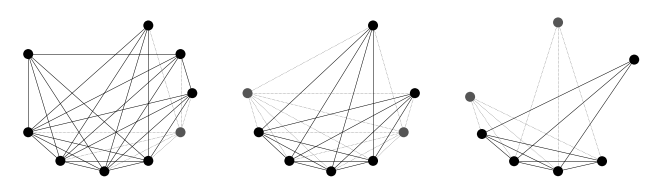

In [13]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(9, 2.5))
for i, ax in enumerate(axes):
    plot_quasiclique(ax, G, quasi_cliques[maximal_idx[i]])
fig.subplots_adjust(0.,0., 1., 1, 0.1, 0.)
#plt.savefig('/home/aalvarez/Downloads/quasiclique.svg', bbox_inches='tight', transparent=True, pad_inches=0)

## Data exaple

In [14]:
means = np.zeros(5)
cov = np.diag(np.ones(5))
cov[0, 1] = cov[1,0] = 0.8
cov[0, 2] = cov[2,0] = -0.5

a = multivariate_normal(means, cov=cov).rvs(50)
b = multivariate_normal(means, cov=cov).rvs(50)

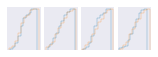

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(2., .6))

axes[0].hist(a[:,0], cumulative=True, histtype='step')
axes[0].hist(b[:,0], cumulative=True, histtype='step')

axes[1].hist(a[:,1], cumulative=True, histtype='step')
axes[1].hist(b[:,1], cumulative=True, histtype='step')

axes[2].hist(a[:,0], cumulative=True, histtype='step')
axes[2].hist(b[:,4], cumulative=True, histtype='step')

axes[3].hist(a[:,4], cumulative=True, histtype='step')
axes[3].hist(b[:,4], cumulative=True, histtype='step')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(0.,0., 1., 1, 0.1, 0.)
#fig.savefig('/home/aalvarez/Downloads/test.svg', bbox_inches='tight', pad_inches=0, facecolor='#FFFFFF00')

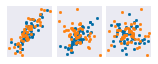

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(2., .7))

axes[0].scatter(a[:,0], a[:,1], marker='.')
axes[0].scatter(b[:,0], b[:,1], marker='.')

axes[1].scatter(a[:,0], a[:,1], marker='.')
axes[1].scatter(b[:,0], b[:,2], marker='.')

axes[2].scatter(a[:,1], a[:,2], marker='.')
axes[2].scatter(b[:,1], b[:,2], marker='.')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(0.,0., 1., 1, 0.1, 0.)
#fig.savefig('/home/aalvarez/Downloads/2edd.svg', bbox_inches='tight', pad_inches=0, facecolor='#FFFFFF00')